# Assignment 6 - Crop Yield Prediction

i) import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
info=pd.read_csv('Cropyieldpredic.csv')
info

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


If i want only 5 rows or last 5

In [39]:
info.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [40]:
info.tail(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246081,West Bengal,PURULIA,2014,Rabi,Rapeseed &Mustard,1885.0,1508.0
246082,West Bengal,PURULIA,2014,Rabi,Safflower,54.0,37.0
246083,West Bengal,PURULIA,2014,Rabi,Urad,220.0,113.0
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


ii) Data cleaning

In [41]:
info.shape

(246091, 7)

In [42]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [43]:
info.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [44]:
data=info.copy()

In [45]:
#Remove the Null values
data=data.dropna()

In [46]:
#Data Wrangling for Updated dataset
data.shape

(242361, 7)

In [47]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [48]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


iv) Data Visualization 

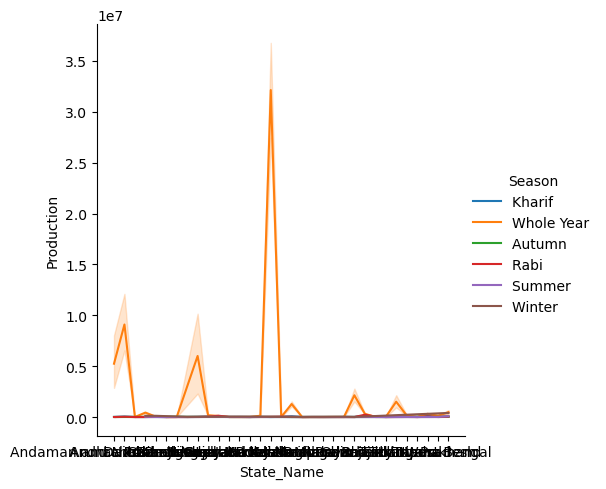

In [49]:
import plotly.express as px
sns.relplot(data=info,x='State_Name',y='Production',hue='Season',
kind='line')

Convert the object and string to Integer

In [50]:
dist=(data['State_Name'])
distset=set(dist)
dd=list(distset)
dictOfWords= { dd[ i ] : i for i in range( 0, len(dd) )}
data['State_Name']=data['State_Name'].map(dictOfWords)

In [51]:
dist=(data['District_Name'])
distset=set(dist)
dd=list(distset)
dictOfWords= { dd[ i ] : i for i in range( 0, len(dd) )}
data['District_Name']=data['District_Name'].map(dictOfWords)

In [52]:
dist=(data['Crop'])
distset=set(dist)
dd=list(distset)
dictOfWords= { dd[ i ] : i for i in range( 0, len(dd) )}
data['Crop']=data['Crop'].map(dictOfWords)

In [53]:
dist=(data['Season'])
distset=set(dist)
dd=list(distset)
dictOfWords= { dd[ i ] : i for i in range( 0, len(dd) )}
data['Season']=data['Season'].map(dictOfWords)

In [54]:
# Correlation Matrix 

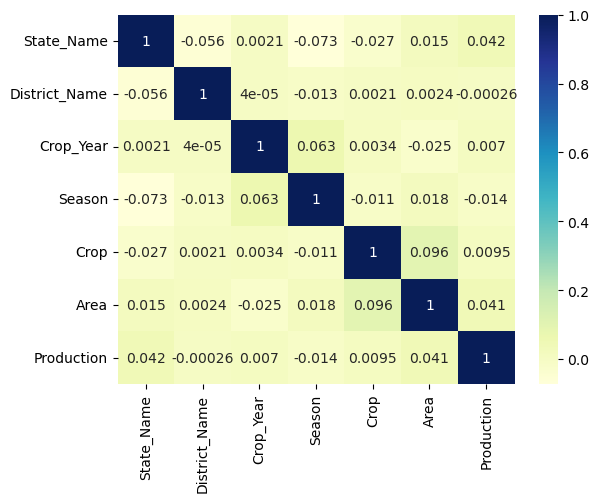

In [55]:
plot=sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [56]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

v) Testing and Training 

In [57]:
features=data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']]
label=data['Production']

In [58]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,label,test_size=0.2,random_state=2)

vi) Using Machine Learning Algorithm 

In [59]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [60]:
reg=RandomForestRegressor(max_depth=1000,random_state=0)
reg.fit(Xtrain,Ytrain)

RandomForestRegressor(max_depth=1000, random_state=0)

In [34]:
Xtest[0:1]

,State_Name,District_Name,Crop_Year,Season,Crop,Area
100493,27,38,2002,1,4,29335.0


In [33]:
y_pred=reg.predict(Xtest)

vii) Accuracy score

In [29]:
from sklearn.metrics import r2_score

In [30]:
print("The accuracy of this model is",r2_score(Ytest,y_pred))

The accuracy of this model is 0.9473644079782547


In [31]:
y_pred

array([3.400634e+04, 2.370000e+01, 4.435043e+04, ..., 4.393310e+03,
       2.588000e+01, 3.489530e+03])

In [35]:
Xtest[0:1]

,State_Name,District_Name,Crop_Year,Season,Crop,Area
100493,27,38,2002,1,4,29335.0


In [37]:
 input=[[27,38,2002,1,4,29335]]
 print("The production is",reg.predict(input))

The production is [34006.34]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
